# WELCOME TO THE FIRST HOMEWORK

In [608]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from sklearn.metrics import mean_squared_error, r2_score

## 1) Discover and process the data

In [609]:
boston = pd.read_csv("E:\\SOFT\\General_Subjects\\artificial_intelligence\\Python\\homework\\h1\\boston_dataset.csv")
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [610]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [611]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

--> No null values, then we don't need to clean the data

In [612]:
boston.isnull().sum()*100/boston.shape[0]

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

### - Analyze the data

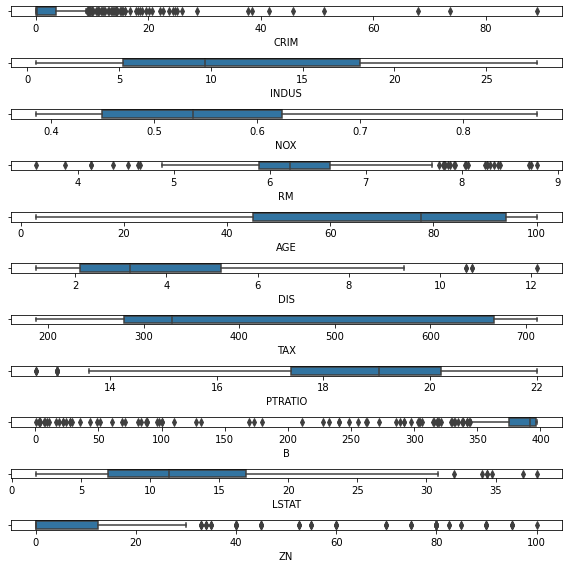

In [613]:
fig, axs = plt.subplots(11, figsize = (8, 8))
plt1 = sns.boxplot(boston['CRIM'], ax = axs[0])
plt3 = sns.boxplot(boston['INDUS'], ax = axs[1])
plt5 = sns.boxplot(boston['NOX'], ax = axs[2])
plt6 = sns.boxplot(boston['RM'], ax = axs[3])
plt7 = sns.boxplot(boston['AGE'], ax = axs[4])
plt5 = sns.boxplot(boston['DIS'], ax = axs[5])
plt6 = sns.boxplot(boston['TAX'], ax = axs[6])
plt7 = sns.boxplot(boston['PTRATIO'], ax = axs[7])
plt6 = sns.boxplot(boston['B'], ax = axs[8])
plt7 = sns.boxplot(boston['LSTAT'], ax = axs[9])
plt1 = sns.boxplot(boston['ZN'], ax = axs[10])
plt.tight_layout()

##### --> Looks like `CRIM`, `ZN`, `B`, `RM` have outliers

In [614]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### * To recognize the realationship between ``MEDV`` and other variables, we use a Heatmap

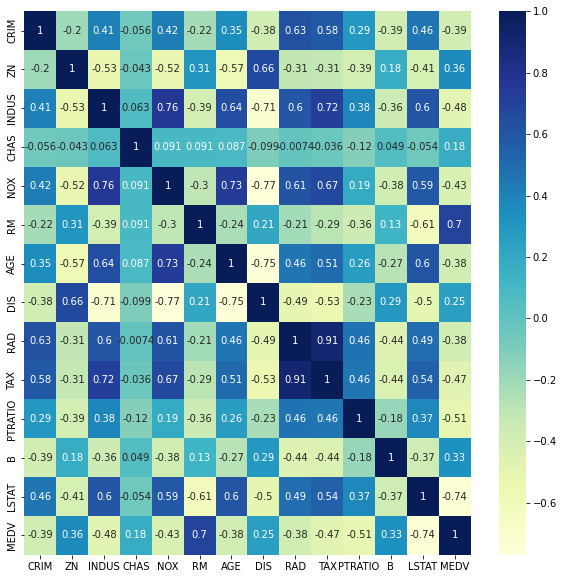

In [615]:
plt.figure(figsize=(10, 10))
sns.heatmap(boston.corr(), cmap="YlGnBu", annot = True)
plt.show()

**TAX ~ RAD: 0.91**

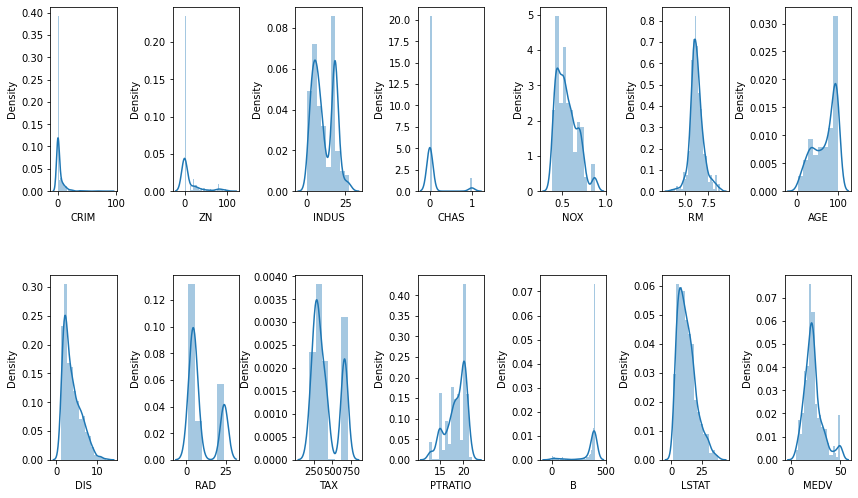

In [616]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 7))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=1, w_pad=0.4, h_pad=5.0)

- Quartiles are used to calculate the interquartile range, which is a measure of variability around the median. 
- The interquartile range is simply calculated as the difference between the first and third quartile: ``Q3–Q1``. In effect, it is the range of the middle half of the data that shows how spread out the data is.

In [617]:
for k, v in boston.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(boston)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))
boston = boston[~(boston['MEDV'] >= 50.0)]
print(np.shape(boston))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%
(490, 14)


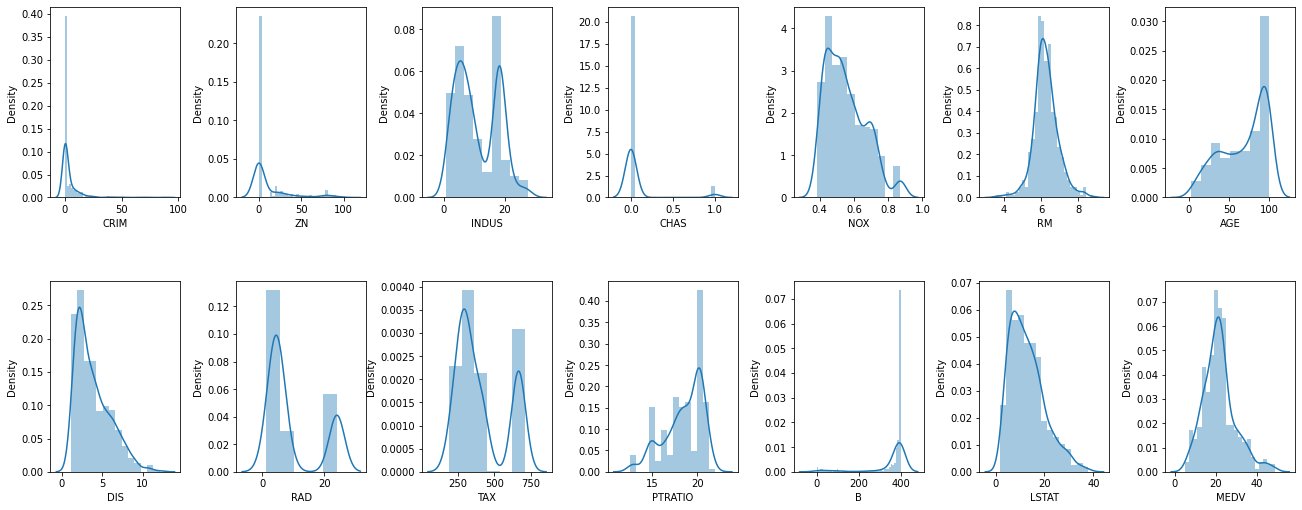

In [618]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(18, 7))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

We may use ``LSTAT``, ``INDUS``, ``RM``, ``TAX``, ``NOX``, ``PTRATIO`` to plot against ``MEDV``, to see if there is a relationship between these variables

## 2) Using linear regression

Plot data and a linear regression model fit, by `sns.regplot()`

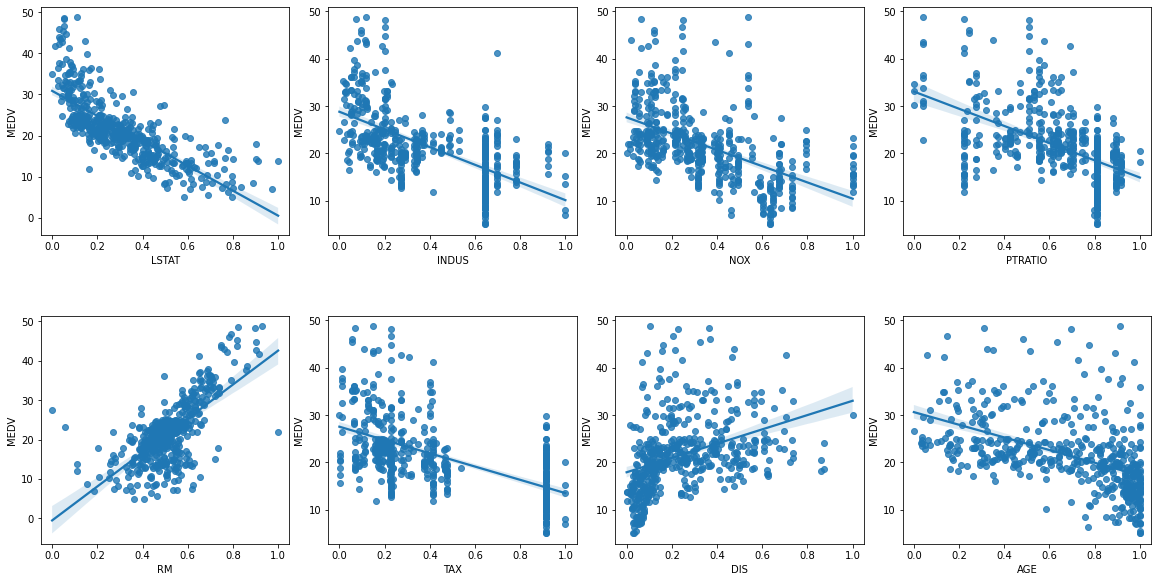

In [619]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = boston.loc[:,column_sels]
y = boston['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16, 8))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

--> `MEDV` Fit not so well with linear regression

In [620]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [621]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import cross_val_score
regression_model = LinearRegression()

In [622]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(regression_model, x_scaled, y, cv=KFold(n_splits=10), scoring='neg_mean_squared_error')

In [623]:
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.04)


## 3) Use Polynomial Regression

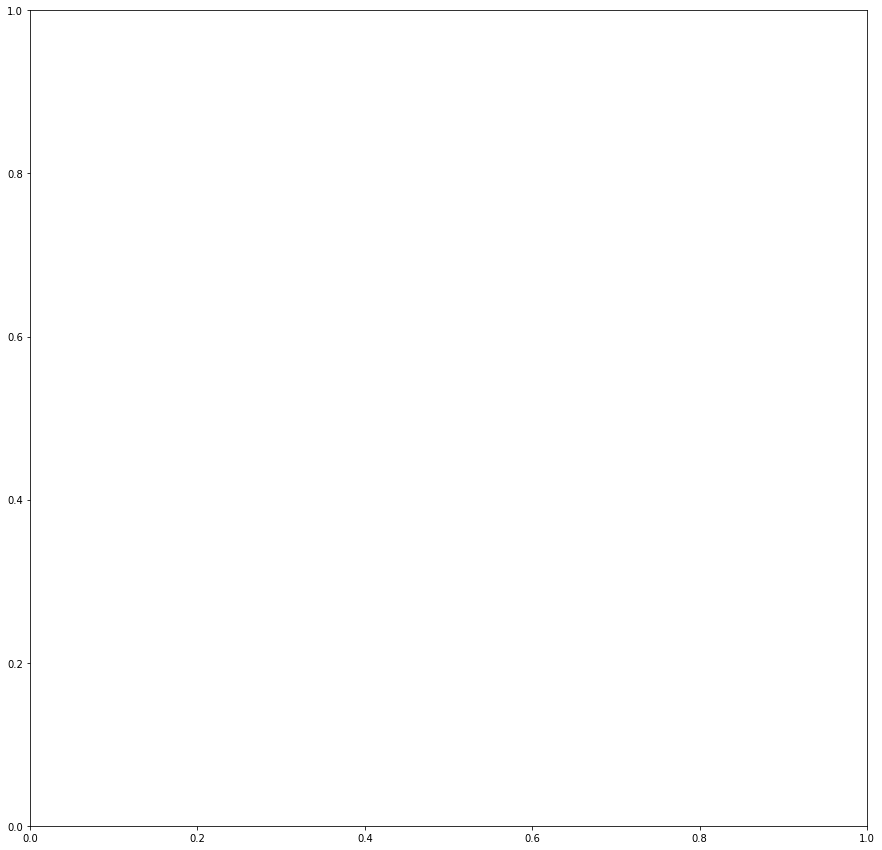

In [624]:
fig, axes = plt.subplots(1, figsize=(15, 15))

In [625]:
from sklearn.preprocessing import PolynomialFeatures

We will try using `LSTAT` to plot against `MEDV` (because `LSTAT` ~ `MEDV` = 0.71)

In [626]:
x = boston['LSTAT']
x

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 490, dtype: float64

- Transform the data to be a 2D array

In [627]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [628]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
x_poly

array([[ 1.    ,  4.98  , 24.8004],
       [ 1.    ,  9.14  , 83.5396],
       [ 1.    ,  4.03  , 16.2409],
       ...,
       [ 1.    ,  5.64  , 31.8096],
       [ 1.    ,  6.48  , 41.9904],
       [ 1.    ,  7.88  , 62.0944]])

In [629]:
x_poly.shape

(490, 3)

In [630]:
x_poly[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [631]:
x_poly[:,1] 

array([ 4.98,  9.14,  4.03,  2.94,  5.33,  5.21, 12.43, 19.15, 29.93,
       17.1 , 20.45, 13.27, 15.71,  8.26, 10.26,  8.47,  6.58, 14.67,
       11.69, 11.28, 21.02, 13.83, 18.72, 19.88, 16.3 , 16.51, 14.81,
       17.28, 12.8 , 11.98, 22.6 , 13.04, 27.71, 18.35, 20.34,  9.68,
       11.41,  8.77, 10.13,  4.32,  1.98,  4.84,  5.81,  7.44,  9.55,
       10.21, 14.15, 18.8 , 30.81, 16.2 , 13.45,  9.43,  5.28,  8.43,
       14.8 ,  4.81,  5.77,  3.95,  6.86,  9.22, 13.15, 14.44,  6.73,
        9.5 ,  8.05,  4.67, 10.24,  8.1 , 13.09,  8.79,  6.72,  9.88,
        5.52,  7.54,  6.78,  8.94, 11.97, 10.27, 12.34,  9.1 ,  5.29,
        7.22,  6.72,  7.51,  9.62,  6.53, 12.86,  8.44,  5.5 ,  5.7 ,
        8.81,  8.2 ,  8.16,  6.21, 10.59,  6.65, 11.34,  4.21,  3.57,
        6.19,  9.42,  7.67, 10.63, 13.44, 12.33, 16.47, 18.66, 14.09,
       12.27, 15.55, 13.  , 10.16, 16.21, 17.09, 10.45, 15.76, 12.04,
       10.3 , 15.37, 13.61, 14.37, 14.27, 17.93, 25.41, 17.58, 14.81,
       27.26, 17.19,

In [632]:
x_poly[:,2]

array([  24.8004,   83.5396,   16.2409,    8.6436,   28.4089,   27.1441,
        154.5049,  366.7225,  895.8049,  292.41  ,  418.2025,  176.0929,
        246.8041,   68.2276,  105.2676,   71.7409,   43.2964,  215.2089,
        136.6561,  127.2384,  441.8404,  191.2689,  350.4384,  395.2144,
        265.69  ,  272.5801,  219.3361,  298.5984,  163.84  ,  143.5204,
        510.76  ,  170.0416,  767.8441,  336.7225,  413.7156,   93.7024,
        130.1881,   76.9129,  102.6169,   18.6624,    3.9204,   23.4256,
         33.7561,   55.3536,   91.2025,  104.2441,  200.2225,  353.44  ,
        949.2561,  262.44  ,  180.9025,   88.9249,   27.8784,   71.0649,
        219.04  ,   23.1361,   33.2929,   15.6025,   47.0596,   85.0084,
        172.9225,  208.5136,   45.2929,   90.25  ,   64.8025,   21.8089,
        104.8576,   65.61  ,  171.3481,   77.2641,   45.1584,   97.6144,
         30.4704,   56.8516,   45.9684,   79.9236,  143.2809,  105.4729,
        152.2756,   82.81  ,   27.9841,   52.1284, 

In [633]:
model = LinearRegression()
model.fit(x_poly, y)
model

LinearRegression()

In [634]:
model.coef_

array([[ 0.        , -0.07001187,  0.00089907]])

In [635]:
model.intercept_

array([3.7674475])

In [636]:
y_poly_pred = model.predict(x_poly)
y_poly_pred

array([[3.44108561],
       [3.20264669],
       [3.49990133],
       [3.56938379],
       [3.41982574],
       [3.42709003],
       [3.03611016],
       [2.75642812],
       [2.47738036],
       [2.83314058],
       [2.71169662],
       [2.99670924],
       [2.88945434],
       [3.25049063],
       [3.14376831],
       [3.23894682],
       [3.34569576],
       [2.9338605 ],
       [3.07187169],
       [3.09210941],
       [2.6930419 ],
       [2.97114682],
       [2.77189273],
       [2.73093556],
       [2.86512702],
       [2.85661918],
       [2.92776947],
       [2.82610222],
       [3.01859864],
       [3.05773971],
       [2.64438644],
       [3.00737144],
       [2.51776146],
       [2.78546562],
       [2.71536391],
       [3.17397731],
       [3.08565985],
       [3.22259324],
       [3.1504867 ],
       [3.48177498],
       [3.63234871],
       [3.44965124],
       [3.39102753],
       [3.29632578],
       [3.18083128],
       [3.14634871],
       [2.9567929 ],
       [2.768

In [637]:
y_poly_pred.shape

(490, 1)

In [638]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
rmse

0.2063149691973941

- Now we draw fitted curve

In [639]:
y_poly_pred

array([[3.44108561],
       [3.20264669],
       [3.49990133],
       [3.56938379],
       [3.41982574],
       [3.42709003],
       [3.03611016],
       [2.75642812],
       [2.47738036],
       [2.83314058],
       [2.71169662],
       [2.99670924],
       [2.88945434],
       [3.25049063],
       [3.14376831],
       [3.23894682],
       [3.34569576],
       [2.9338605 ],
       [3.07187169],
       [3.09210941],
       [2.6930419 ],
       [2.97114682],
       [2.77189273],
       [2.73093556],
       [2.86512702],
       [2.85661918],
       [2.92776947],
       [2.82610222],
       [3.01859864],
       [3.05773971],
       [2.64438644],
       [3.00737144],
       [2.51776146],
       [2.78546562],
       [2.71536391],
       [3.17397731],
       [3.08565985],
       [3.22259324],
       [3.1504867 ],
       [3.48177498],
       [3.63234871],
       [3.44965124],
       [3.39102753],
       [3.29632578],
       [3.18083128],
       [3.14634871],
       [2.9567929 ],
       [2.768

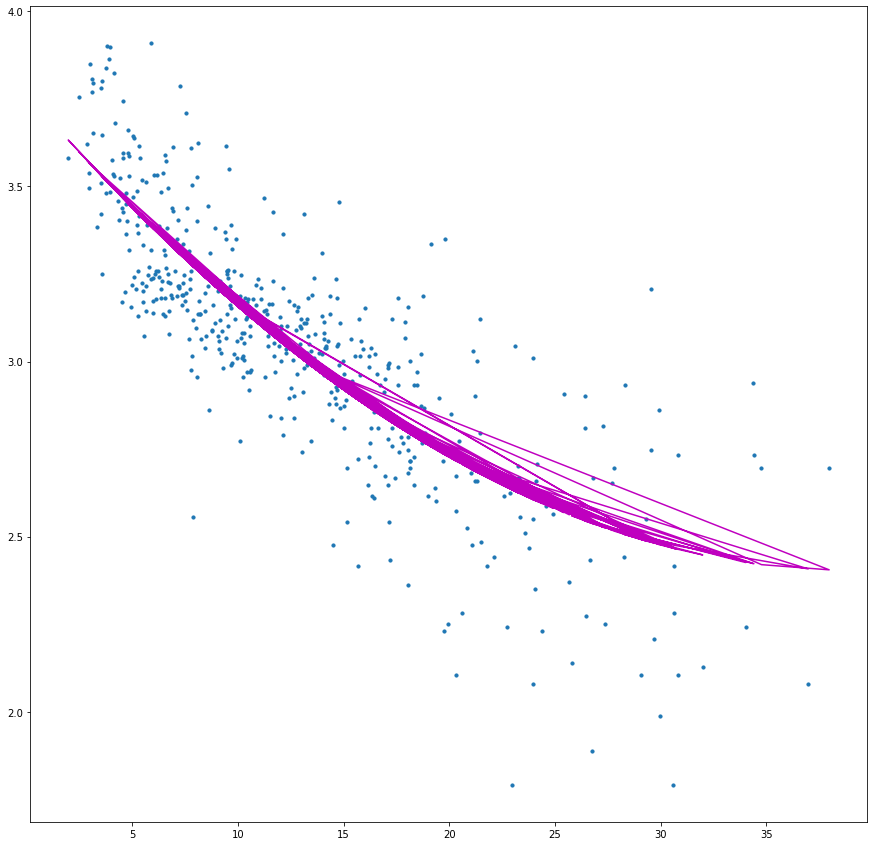

In [640]:
fig, axes = plt.subplots(1, figsize=(15, 15))
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')

In [641]:
model.coef_.shape

(1, 3)

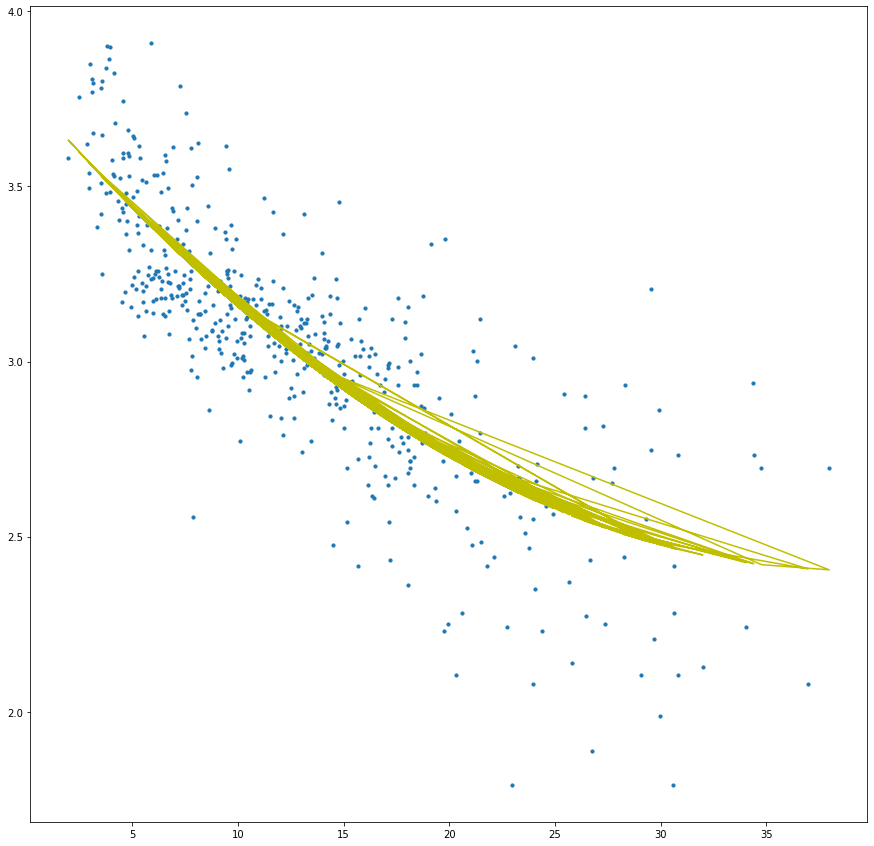

In [642]:
fig, axes = plt.subplots(1, figsize=(15, 15))
plt.scatter(x, y, s=10)
plt.plot(x, model.coef_[0][0] + model.coef_[0][1] *x + model.coef_[0][2] *x*x + model.intercept_, color='y')
plt.show()

**Try another degree, still with `LSTAT`**

In [643]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree, X_train, Y_train, axes ):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)

  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))

  
  print("The model performance for the training set at degree", degree, "is: ")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))

  fig, axes = plt.subplots(1, figsize=(15, 15))
  plt.scatter(x, y, s=10)
  axes.plot(X_train,y_train_predicted, label = str(degree)) 
  plt.show()
 
  print("\n")

The model performance for the training set at degree 2 is: 
-------------------------------------------
RMSE of training set is 0.2063149691973941


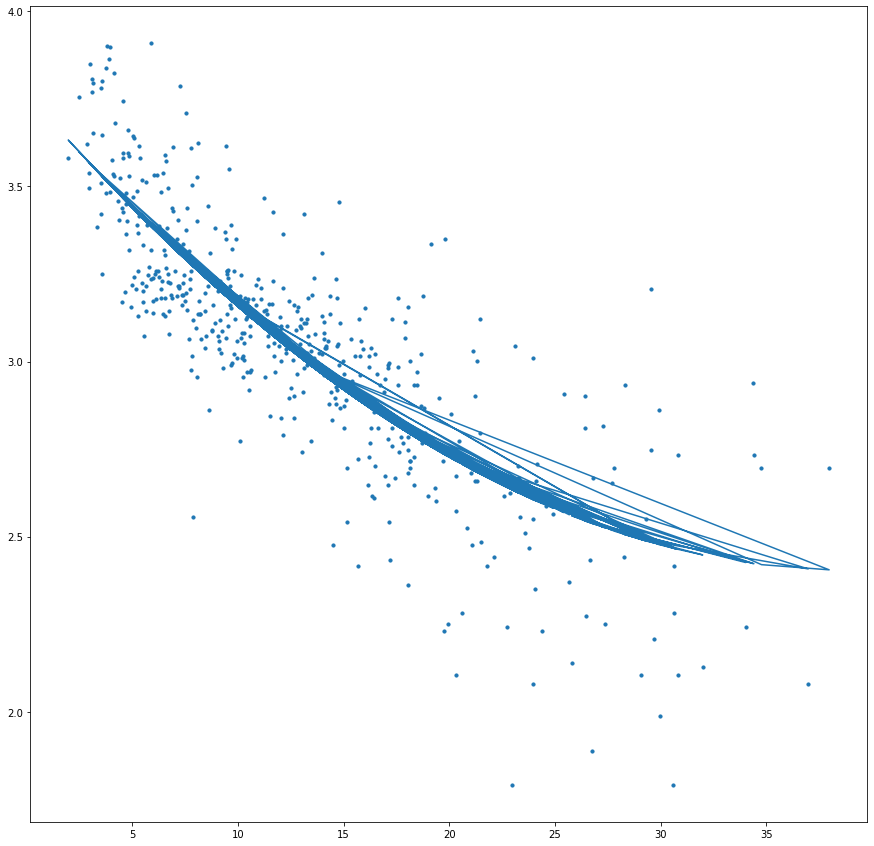

In [644]:
create_polynomial_regression_model(2, x, y, axes)

The model performance for the training set at degree 3 is: 
-------------------------------------------
RMSE of training set is 0.20629993673908686


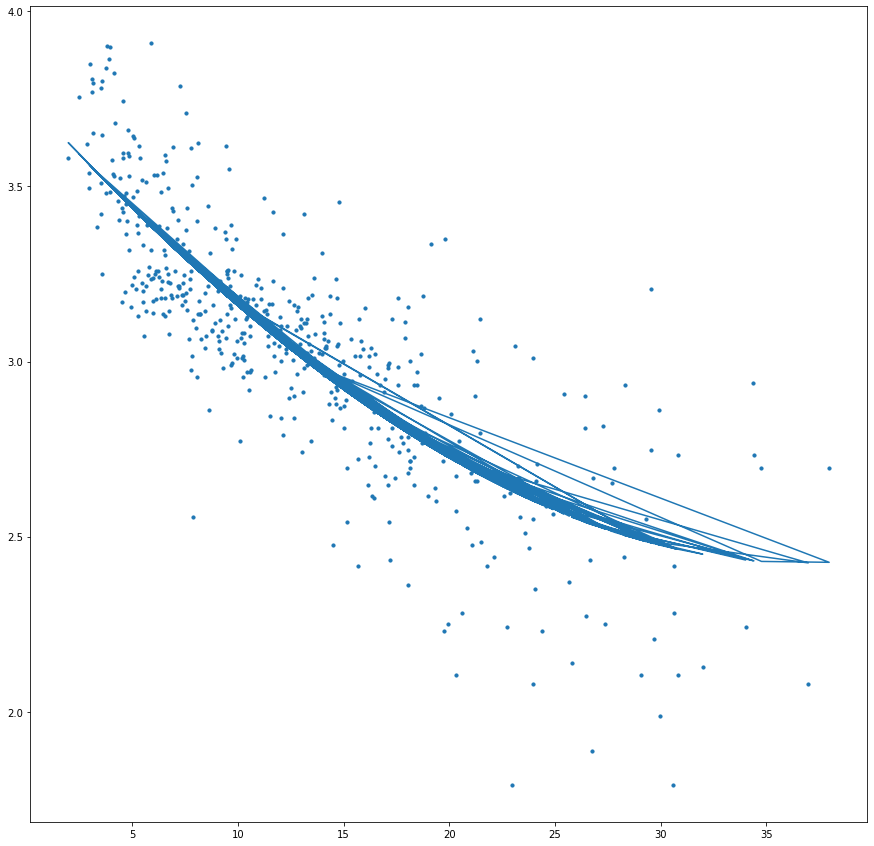

In [645]:
create_polynomial_regression_model(3, x, y, axes)

**The higher the degree, the smaller the RMSE --> better model**

## 4) Another method to build Polynomial Regression (looks reasonable, but result looks different to the above method, unable to explain)

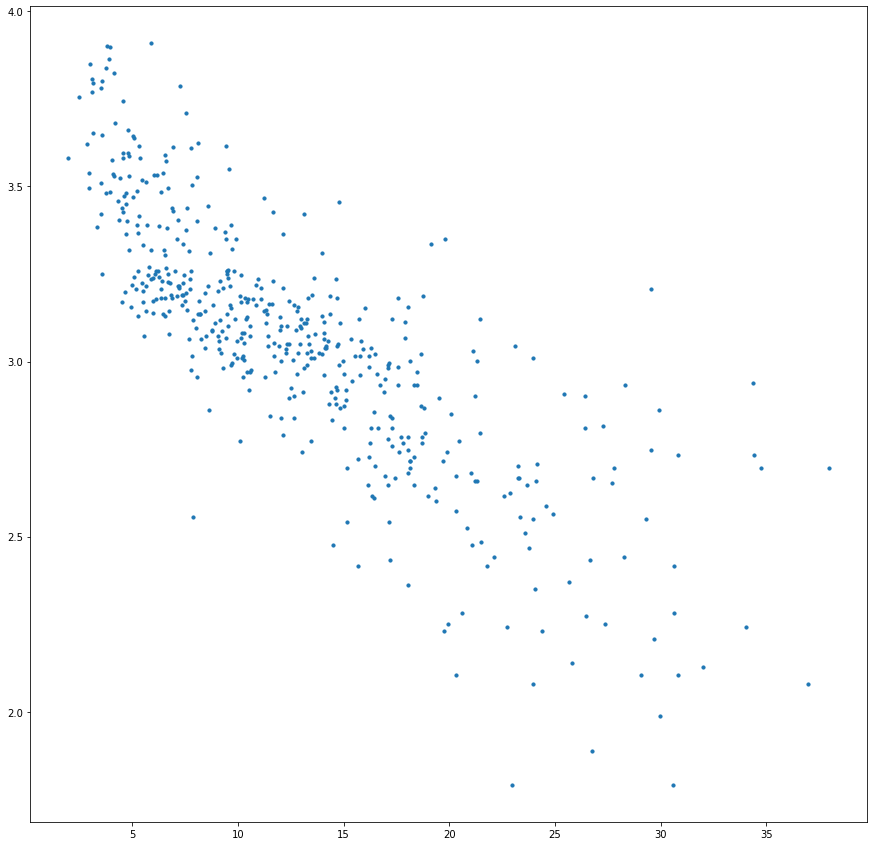

In [646]:
fig, axes = plt.subplots(1, figsize=(15, 15))
axes.scatter(x, y, s=10)

In [647]:
x.shape

(490, 1)

In [648]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [649]:
x_train.shape

(392, 1)

In [650]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

In [651]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    X_new=np.linspace(0, 40, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.plot(x_train, y_train, "b.",label='Training points')
    plt.plot(x_test, y_test, "g.",label='Testing points')
    axes.scatter(x, y, s=10)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([0, 40, 0, 5])
    plt.show()

- plot with degree 2

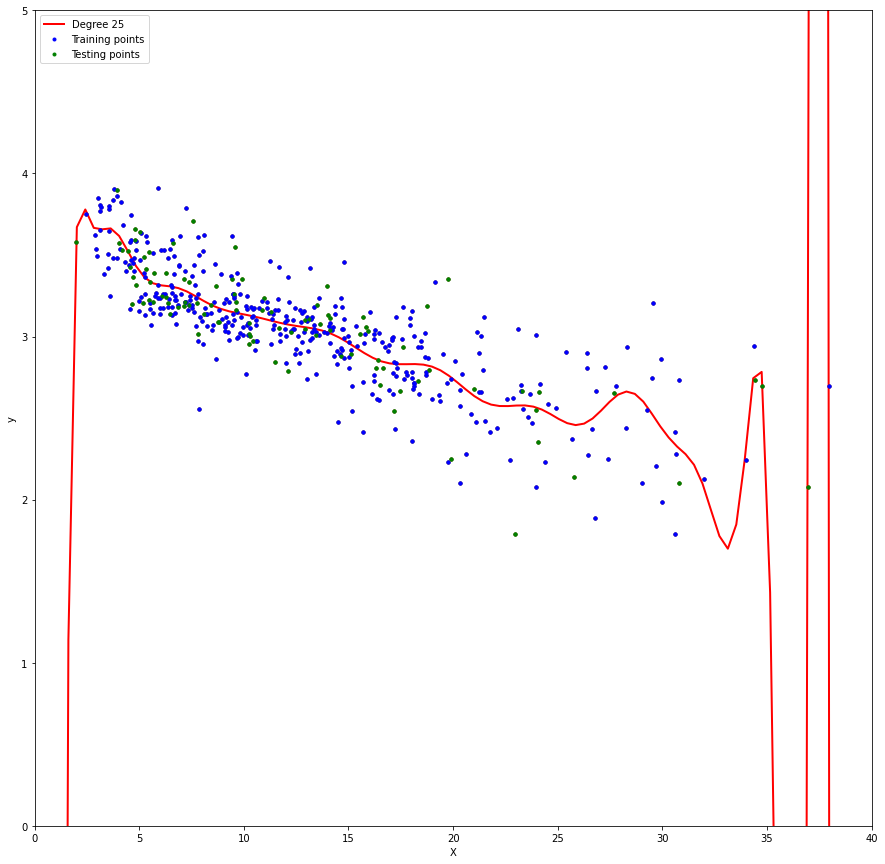

In [652]:
fig, axes = plt.subplots(1, figsize=(15, 15))
axes.scatter(x, y, s=10)
polynomial_regression(25)

- plot with degree 25

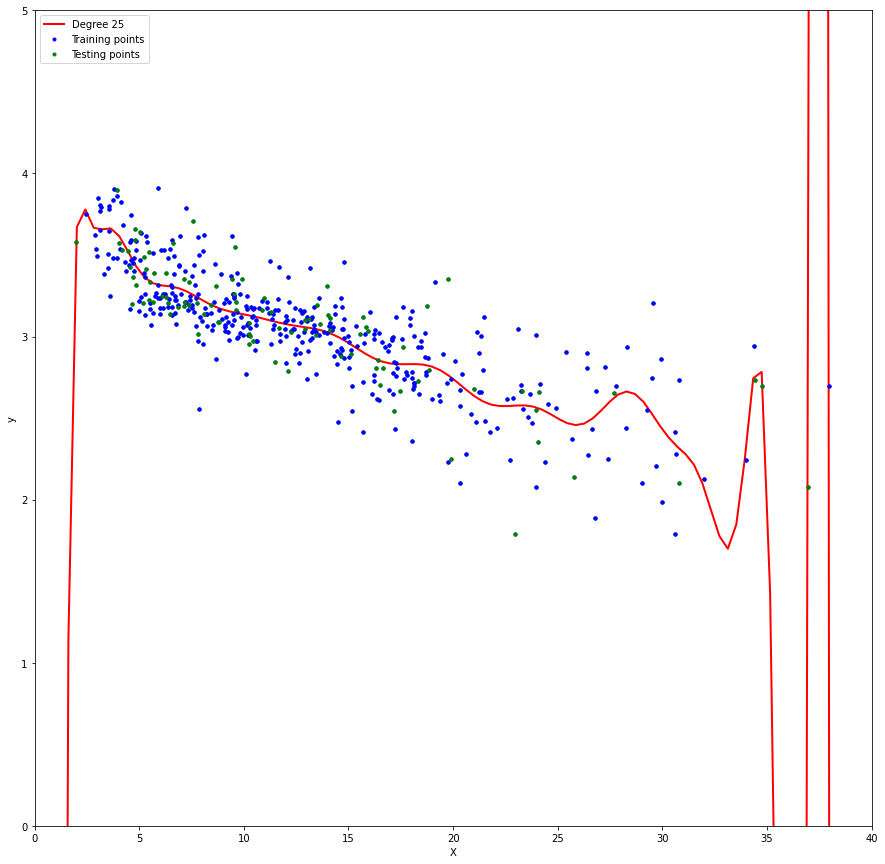

In [653]:
fig, axes = plt.subplots(1, figsize=(15, 15))
polynomial_regression(25)

- plot with degree 30

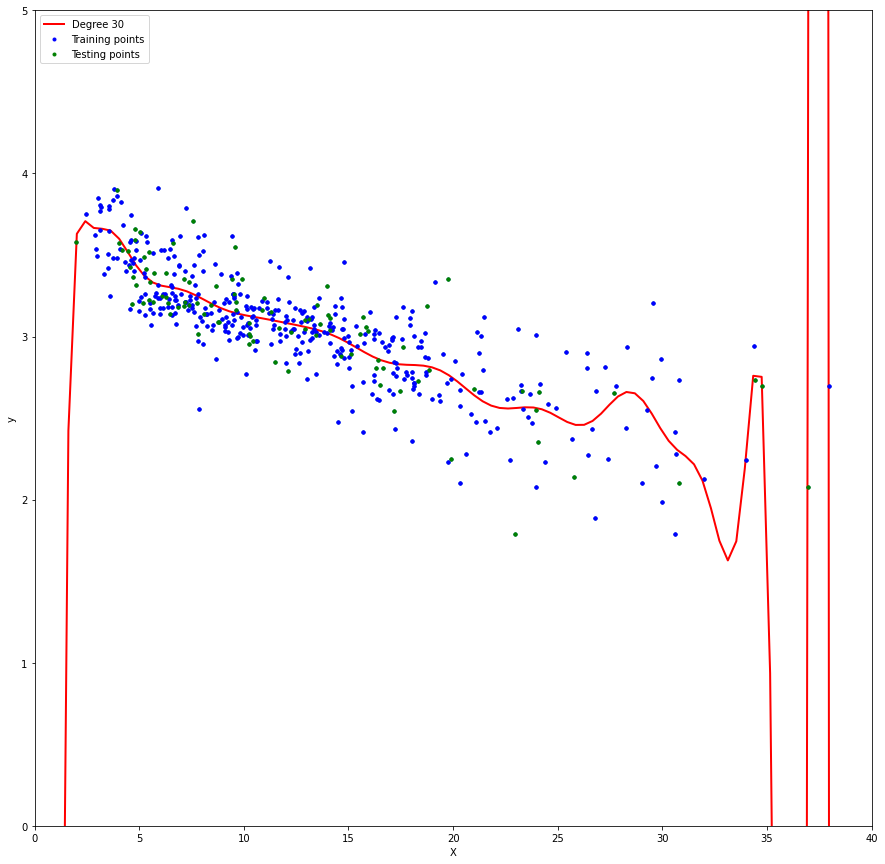

In [654]:
fig, axes = plt.subplots(1, figsize=(15, 15))
polynomial_regression(30)

--> The curve "pretty" fit with the data points